## Information

- The dataset (data_copy) was collected from the following source: https://github.com/guilhermedom/cnn-fashion-mnist

- Parts of the code have been adapted from that repository.

- Any code generated with the help of AI tools is explicitly marked within the code.

- Some code snippets are also reused or adapted from assignments in the Deep Learning course, which is noted accordingly in the code.

- TODO: Calibrate the model , I don´t know how 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from sklearn.metrics import confusion_matrix, classification_report

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [2]:
import zipfile

# Extract training set from MNIST dataset.
zip_object = zipfile.ZipFile('data_copy/raw/fashion-mnist-train.zip')
zip_object.extractall('data_copy/raw/')
zip_object.close()

# Extract testing set from MNIST dataset.
zip_object = zipfile.ZipFile('data_copy/raw/fashion-mnist-test.zip')
zip_object.extractall('data_copy/raw/')
zip_object.close()

In [3]:
fashion_train_df = pd.read_csv('data_copy/raw/fashion-mnist-train.csv')
fashion_test_df = pd.read_csv('data_copy/raw/fashion-mnist-test.csv')


In [4]:
print(fashion_train_df.shape)
display(fashion_train_df)

print(fashion_test_df.shape)
display(fashion_test_df)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
import torch.nn as nn
import torch.nn.functional as F
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
        self.pool_1 = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)
        self.pool_2 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)

        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool_1(x)

        x = F.relu(self.conv2(x))
        x = self.pool_2(x)

        x = F.relu(self.conv3(x))

        x = x.view(x.size(0), -1)  # flatten
        x = self.fc(x)
        return x
    
model = CNN()


In [6]:
pip install torchinfo


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
from torchinfo import summary

model = CNN()
summary(model, input_size=(64, 1, 28, 28))


Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 10]                  --
├─Conv2d: 1-1                            [64, 8, 28, 28]           80
├─MaxPool2d: 1-2                         [64, 8, 14, 14]           --
├─Conv2d: 1-3                            [64, 16, 14, 14]          1,168
├─MaxPool2d: 1-4                         [64, 16, 7, 7]            --
├─Conv2d: 1-5                            [64, 32, 7, 7]            4,640
├─Linear: 1-6                            [64, 10]                  15,690
Total params: 21,578
Trainable params: 21,578
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 34.22
Input size (MB): 0.20
Forward/backward pass size (MB): 5.62
Params size (MB): 0.09
Estimated Total Size (MB): 5.91

In [8]:
from sklearn.model_selection import train_test_split

X = fashion_train_df.drop("label", axis=1).values
y = fashion_train_df["label"].values


# Split into train (85%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_test = fashion_test_df.drop("label", axis=1).values
y_test = fashion_test_df["label"].values

print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Train: (51000, 784) (51000,)
Validation: (9000, 784) (9000,)
Test: (10000, 784) (10000,)


In [9]:
import torch
from torch.utils.data import TensorDataset, DataLoader
# Some part of this section is taken from Deep learning course assigment

# Convert NumPy arrays → PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Wrap in TensorDataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoaders
batch_size = X_train.shape[0] // 20
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

# # check
# images, labels = next(iter(train_loader))
# print("Batch:", images.shape, labels.shape)   # expected value. (64, 784), (64,)


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import time
# This function is taken from deeplearning course assigment
def train_model(model, train_loader, val_loader, epochs=100, learning_rate=1e-3, patience=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    # optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-2)
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)


    train_losses, train_accs = [], []
    val_losses, val_accs = [], []

    best_val_loss = float("inf")
    patience_counter = 0
    best_model_state = None

    start = time.perf_counter()

    for epoch in range(epochs):
        # ---- Training ----
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 1, 28, 28)  # reshape
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(100 * correct / total)

        # ---- Validation ----
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.view(-1, 1, 28, 28)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(100 * correct / total)

        # ---- Early Stopping ---- 
        # This section is added by AI and is used in cases where we decide to try higher epoc number
        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            patience_counter = 0
            best_model_state = model.state_dict()  # save best model
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                model.load_state_dict(best_model_state)  # restore best model
                break

        print(f"Epoch {epoch+1}/{epochs}: "
              f"Train Loss={train_losses[-1]:.4f}, Train Acc={train_accs[-1]:.2f}%, "
              f"Val Loss={val_losses[-1]:.4f}, Val Acc={val_accs[-1]:.2f}%")

    training_time = time.perf_counter() - start
    return train_losses, train_accs, val_losses, val_accs, training_time


In [11]:
train_losses, train_accs, val_losses, val_accs, training_time = train_model(
    model, train_loader, val_loader,
    epochs=100,         
    learning_rate=1e-3,  # safe for Adam
    patience=10
)


Epoch 1/100: Train Loss=1.6063, Train Acc=56.41%, Val Loss=0.7259, Val Acc=73.64%
Epoch 2/100: Train Loss=0.6102, Train Acc=77.61%, Val Loss=0.5483, Val Acc=79.98%
Epoch 3/100: Train Loss=0.4785, Train Acc=82.72%, Val Loss=0.4530, Val Acc=83.92%
Epoch 4/100: Train Loss=0.4074, Train Acc=85.49%, Val Loss=0.4048, Val Acc=85.88%
Epoch 5/100: Train Loss=0.3654, Train Acc=87.13%, Val Loss=0.3806, Val Acc=86.67%
Epoch 6/100: Train Loss=0.3412, Train Acc=88.06%, Val Loss=0.3674, Val Acc=87.02%
Epoch 7/100: Train Loss=0.3219, Train Acc=88.73%, Val Loss=0.3537, Val Acc=87.49%
Epoch 8/100: Train Loss=0.3060, Train Acc=89.17%, Val Loss=0.3440, Val Acc=87.91%
Epoch 9/100: Train Loss=0.2976, Train Acc=89.44%, Val Loss=0.3436, Val Acc=88.13%
Epoch 10/100: Train Loss=0.2856, Train Acc=89.89%, Val Loss=0.3438, Val Acc=88.21%
Epoch 11/100: Train Loss=0.2772, Train Acc=90.24%, Val Loss=0.3286, Val Acc=88.67%
Epoch 12/100: Train Loss=0.2668, Train Acc=90.53%, Val Loss=0.3255, Val Acc=88.60%
Epoch 13/100:

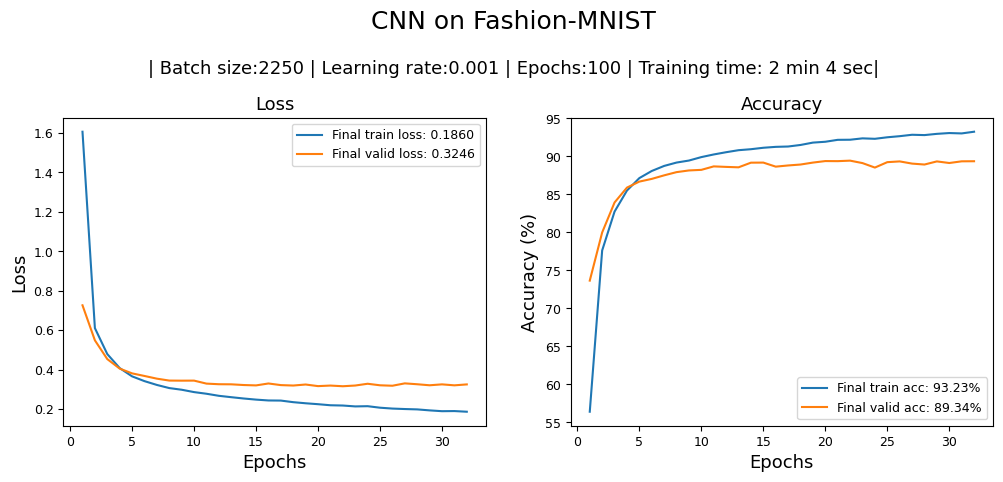

In [20]:
from matplotlib import pyplot as plt
import numpy as np

def training_curve_plot(title, train_costs, valid_costs, train_accuracies, valid_accuracies, batch_size, learning_rate, training_time, epochs):
    lg=18
    md=13
    sm=9
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(title, y=1.15, fontsize=lg)
    
    mins, secs = divmod(training_time, 60)
    sub = f'| Batch size:{batch_size} | Learning rate:{learning_rate} | Epochs:{epochs} | Training time: {int(mins)} min {secs:.0f} sec|'
    fig.text(0.5, 0.99, sub, ha='center', fontsize=md)
    
    x = range(1, len(train_costs)+1)

    # ---- Loss plot ----
    axs[0].plot(x, train_costs, label=f'Final train loss: {train_costs[-1]:.4f}')
    axs[0].plot(x, valid_costs, label=f'Final valid loss: {valid_costs[-1]:.4f}')
    axs[0].set_title('Loss', fontsize=md)
    axs[0].set_xlabel('Epochs', fontsize=md)
    axs[0].set_ylabel('Loss', fontsize=md)
    axs[0].legend(fontsize=sm)
    axs[0].tick_params(axis='both', labelsize=sm)

    # ---- Accuracy plot ----
    axs[1].plot(x, train_accuracies, label=f'Final train acc: {train_accuracies[-1]:.2f}%')
    axs[1].plot(x, valid_accuracies, label=f'Final valid acc: {valid_accuracies[-1]:.2f}%')
    axs[1].set_title('Accuracy', fontsize=md)
    axs[1].set_xlabel('Epochs', fontsize=md)
    axs[1].set_ylabel('Accuracy (%)', fontsize=md)
    axs[1].legend(fontsize=sm)
    axs[1].tick_params(axis='both', labelsize=sm)

    plt.show()

training_curve_plot(
    "CNN on Fashion-MNIST",
    train_losses,     # training loss
    val_losses,       # validation loss
    train_accs,       # training accuracy
    val_accs,         # validation accuracy
    batch_size=2250,
    learning_rate=1e-3,
    training_time=training_time,
    epochs=100
)


In [13]:
# Final evaluation on test set
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 1, 28, 28)  # adjust shape if needed
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Final Test Accuracy: 89.76%


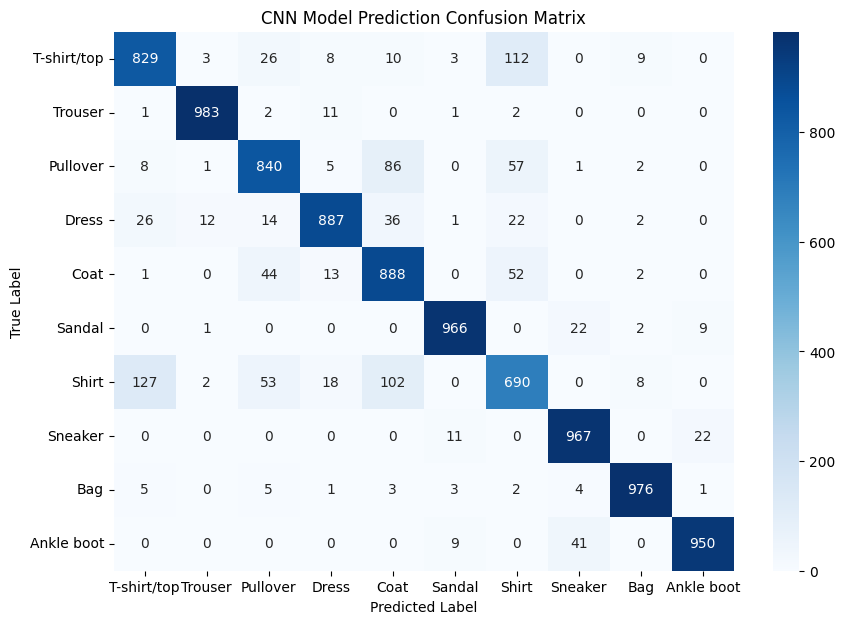

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# AI generated and taken from Deep learning assigment 
def get_predictions(model, loader, device="cpu"):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # reshape if flattened
            if inputs.ndim == 2 and inputs.shape[1] == 784:
                inputs = inputs.view(-1, 1, 28, 28)
            
            outputs = model(inputs)  # logits
            _, preds = torch.max(outputs, 1)  # class indices

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    return np.array(all_labels), np.array(all_preds)


class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
# Testing the value with the testset 
y_true, y_pred_classes = get_predictions(model, test_loader)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("CNN Model Prediction Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [16]:
print(classification_report(y_test, y_pred_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.85      0.84      0.85      1000
       Dress       0.94      0.89      0.91      1000
        Coat       0.79      0.89      0.84      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.74      0.69      0.71      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [17]:
# This function is AI generated 
def show_random_predictions(test_loader, all_preds, all_labels, class_names, num_images=10):
    indices = np.random.choice(len(all_labels), num_images, replace=False)

    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(indices):
        # Get image and true label from dataset
        image, label = test_loader.dataset[idx]
        predicted_label = all_preds[idx]

        plt.subplot(2, 5, i + 1)
        
        # If image is flattened, reshape to 28x28
        if image.ndim == 1:
            image = image.view(28, 28)
        elif image.ndim == 3:  # (1, 28, 28)
            image = image.squeeze(0)

        plt.imshow(image.cpu().numpy(), cmap="gray")
        plt.axis("off")

        # Green title if correct, red if wrong
        color = "green" if predicted_label == label else "red"
        plt.title(f"True: {class_names[label]}\nPred: {class_names[predicted_label]}",
                  fontsize=10, color=color)

    plt.tight_layout()
    plt.show()


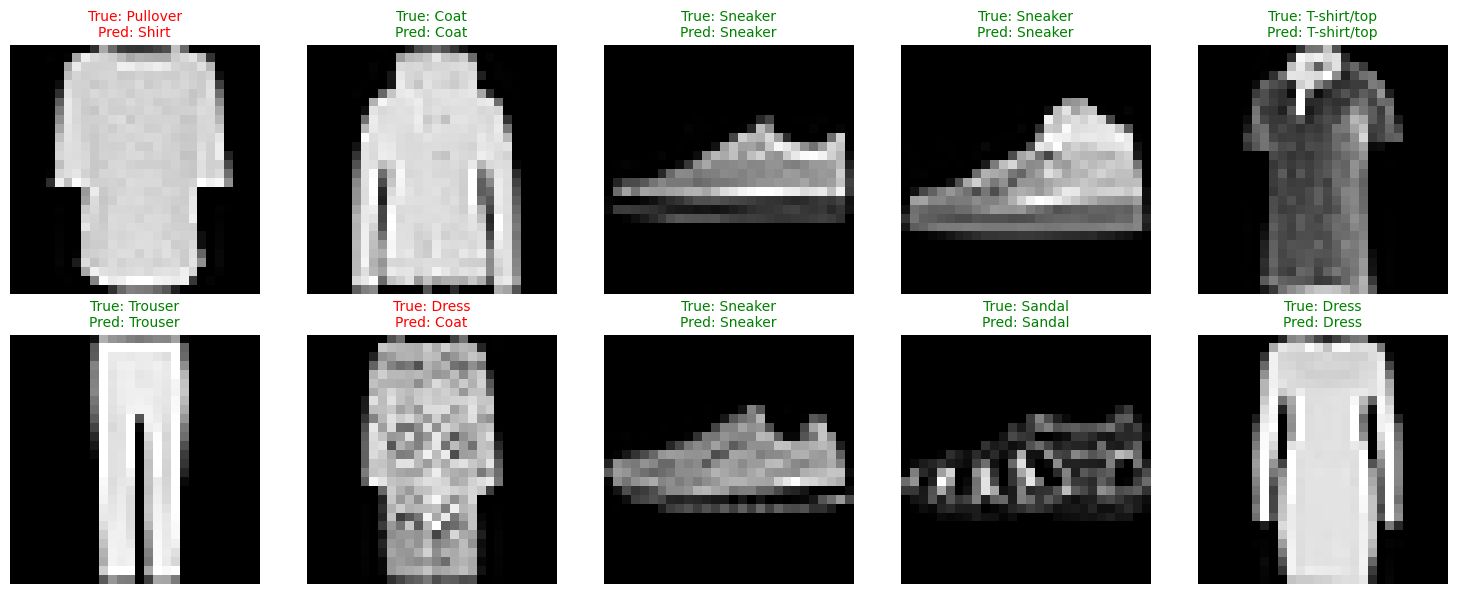

In [19]:
show_random_predictions(test_loader, y_pred_classes, y_true, class_names, num_images=10)


## The calibration 
The part follows a method called Temperature Scaling : https://docs.aws.amazon.com/prescriptive-guidance/latest/ml-quantifying-uncertainty/temp-scaling.html Before applying softmax, we introduce a scaling factor called the temperature T. This temperature adjusts how spread out or sharp the softmax probabilities are: 
1. A higher T makes the probabilities more calmer (lower confidence).
2. A lower T makes the probabilities more extrem (higher confidence).


- TODO: Still working on this section and the code here is mostly AI generated 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ModelWithTemperature(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.temperature = nn.Parameter(torch.ones(1) * 1.0)  # initial T=1.0

    def forward(self, input):
        logits = self.model(input)
        return self.temperature_scale(logits)

    def temperature_scale(self, logits):
        return logits / self.temperature

    def set_temperature(self, valid_loader):
        """Tune the temperature using validation data."""
        self.eval()
        nll_criterion = nn.CrossEntropyLoss()

        logits_list, labels_list = [], []
        with torch.no_grad():
            for inputs, labels in valid_loader:
                # reshape if flattened
                if inputs.ndim == 2:  # shape [batch, 784]
                    inputs = inputs.view(-1, 1, 28, 28)  # MNIST/Fashion-MNIST

                logits = self.model(inputs)
                logits_list.append(logits)
                labels_list.append(labels)

        logits = torch.cat(logits_list)
        labels = torch.cat(labels_list)

        optimizer = torch.optim.LBFGS([self.temperature], lr=0.01, max_iter=50)

        def eval_closure():
            optimizer.zero_grad()
            loss = nll_criterion(self.temperature_scale(logits), labels)
            loss.backward()
            return loss

        optimizer.step(eval_closure)
        # print(inputs.shape)
        return self


In [40]:
# After training your CNN model
model_with_temp = ModelWithTemperature(model)

# Calibrate temperature on validation set
model_with_temp.set_temperature(val_loader)

all_probs, all_labels = [], []

model_with_temp.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        # reshape if flattened
        if inputs.ndim == 2:
            inputs = inputs.view(-1, 1, 28, 28)

        logits = model_with_temp(inputs)
        probs = F.softmax(logits, dim=1)

        all_probs.append(probs.numpy())
        all_labels.append(labels.numpy())
        
        print("Logits shape:", logits.shape)
        print("Probs shape:", probs.shape)
        print("First row of probs:", probs[0])

all_probs = np.vstack(all_probs)    # shape [N, num_classes]
all_labels = np.hstack(all_labels)
        

Logits shape: torch.Size([2550, 10])
Probs shape: torch.Size([2550, 10])
First row of probs: tensor([9.3167e-01, 8.9854e-09, 1.5092e-04, 2.3823e-05, 8.1121e-06, 5.3363e-11,
        6.8146e-02, 5.7380e-14, 3.7817e-06, 1.3434e-12])
Logits shape: torch.Size([2550, 10])
Probs shape: torch.Size([2550, 10])
First row of probs: tensor([1.5001e-03, 2.9644e-07, 9.8672e-01, 8.4896e-08, 8.7218e-03, 3.6049e-09,
        3.0520e-03, 5.1810e-12, 2.1655e-06, 4.9284e-10])
Logits shape: torch.Size([2550, 10])
Probs shape: torch.Size([2550, 10])
First row of probs: tensor([5.2857e-06, 9.7937e-11, 5.2041e-07, 1.7003e-07, 6.9572e-07, 9.9997e-01,
        1.7066e-07, 1.2592e-08, 1.9657e-05, 5.1270e-10])
Logits shape: torch.Size([2350, 10])
Probs shape: torch.Size([2350, 10])
First row of probs: tensor([3.1533e-08, 1.0000e+00, 1.6545e-11, 1.0611e-08, 1.6122e-09, 5.8484e-15,
        3.0893e-09, 5.7956e-15, 1.7606e-12, 5.4684e-14])


In [41]:
pred_labels = probs.argmax(dim=1)         # predicted class
confidences = probs.max(dim=1).values     # confidence score
print("predicted class",pred_labels)
print("confidence score", confidences)

predicted class tensor([1, 9, 1,  ..., 8, 8, 1])
confidence score tensor([1.0000, 1.0000, 0.9999,  ..., 0.9999, 0.9988, 0.6875])


In [43]:
from sklearn.metrics import log_loss
import numpy as np

# Negative Log Likelihood
nll = log_loss(all_labels, all_probs)

# Multiclass Brier score (manual calculation)
one_hot = np.zeros_like(all_probs)
one_hot[np.arange(len(all_labels)), all_labels] = 1
brier = np.mean(np.sum((all_probs - one_hot) ** 2, axis=1))

print("NLL (cross-entropy):", nll)
print("Brier score (multiclass):", brier)


NLL (cross-entropy): 0.2812589572630631
Brier score (multiclass): 0.14503208


ECE: 0.016762029272317923


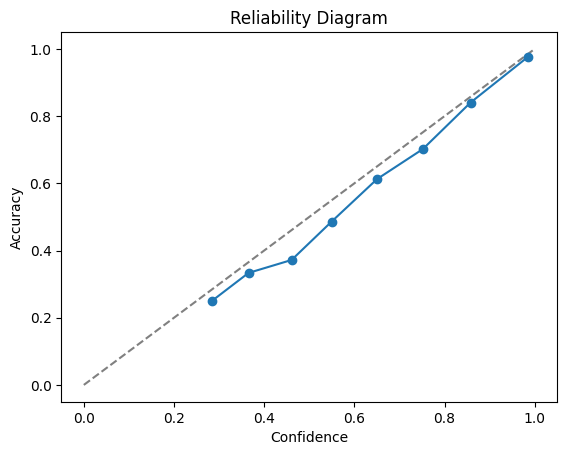

In [45]:
import matplotlib.pyplot as plt

def reliability_diagram(probs, labels, n_bins=10):
    confidences = probs.max(axis=1)
    predictions = probs.argmax(axis=1)
    accuracies = (predictions == labels)

    bins = np.linspace(0.0, 1.0, n_bins+1)
    binids = np.digitize(confidences, bins) - 1

    bin_accs, bin_confs = [], []
    for i in range(n_bins):
        bin_conf = confidences[binids == i]
        bin_acc  = accuracies[binids == i]
        if len(bin_conf) > 0:
            bin_confs.append(bin_conf.mean())
            bin_accs.append(bin_acc.mean())

    plt.plot([0,1],[0,1], linestyle="--", color="gray")
    plt.plot(bin_confs, bin_accs, marker="o")
    plt.xlabel("Confidence")
    plt.ylabel("Accuracy")
    plt.title("Reliability Diagram")
    plt.show()

def expected_calibration_error(probs, labels, n_bins=10):
    confidences = probs.max(axis=1)
    predictions = probs.argmax(axis=1)
    accuracies = (predictions == labels)

    bins = np.linspace(0.0, 1.0, n_bins+1)
    binids = np.digitize(confidences, bins) - 1

    ece = 0.0
    for i in range(n_bins):
        bin_conf = confidences[binids == i]
        bin_acc  = accuracies[binids == i]
        if len(bin_conf) > 0:
            ece += abs(bin_acc.mean() - bin_conf.mean()) * len(bin_conf) / len(confidences)
    return ece

print("ECE:", expected_calibration_error(all_probs, all_labels))
reliability_diagram(all_probs, all_labels)

